In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import quimb as qu
import cotengra as ctg
import autoray as ar
import register_ as reg
import algo_cooling as algo
import algo_dmrg
import quf
import time
import numpy as np

In [2]:
reg.reg_complex_svd()
import torch
to_backend = algo.backend_torch(device = "cpu", dtype = torch.complex128)
to_backend_ = algo.backend_numpy( dtype = "complex128")

opt = algo.opt_(progbar=False)

In [3]:
L = 16
p = qtn.MPS_rand_state(L=L, bond_dim=20, seed=4)


In [4]:
info_c = {}
mpo =qtn.MPO_rand(L, phys_dim=2, bond_dim=4)
# mpo =qtn.MPO_identity(L, phys_dim=2)

mpo.canonicalize_([5, L-1], cur_orthog='calc', info=info_c)
mpo.show()

mpo_g = algo_dmrg.gate_1d(mpo, (6, L-1), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=False)
mpo_g = algo_dmrg.gate_1d(mpo, (6, L-1), qu.CNOT(), ind_id="b{}", site_tags="I{}", contract='split-gate', inplace=False)

algo_dmrg.gate_1d(mpo_g, (5, 12), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)
algo_dmrg.gate_1d(mpo_g, (5, 12), qu.CNOT(), ind_id="b{}", site_tags="I{}", contract='split-gate', inplace=True)

algo_dmrg.gate_1d(mpo_g, (6, 14), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)
algo_dmrg.gate_1d(mpo_g, (6, 14), qu.CNOT(), ind_id="b{}", site_tags="I{}", contract='split-gate', inplace=True)




│4│4│4│4│4│4│4│4│4│4│4│4│4│4│4│
>─>─>─>─>─●─●─●─●─●─●─●─●─●─●─●
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │


MatrixProductOperator(tensors=26, indices=62, L=16, max_bond=4)

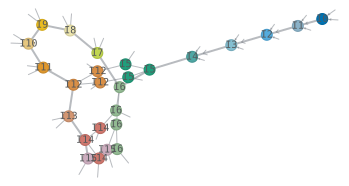

0.9999999999999987

In [5]:
mpo_g.draw(mpo.site_tags, legend=False)
mpo_g.norm()

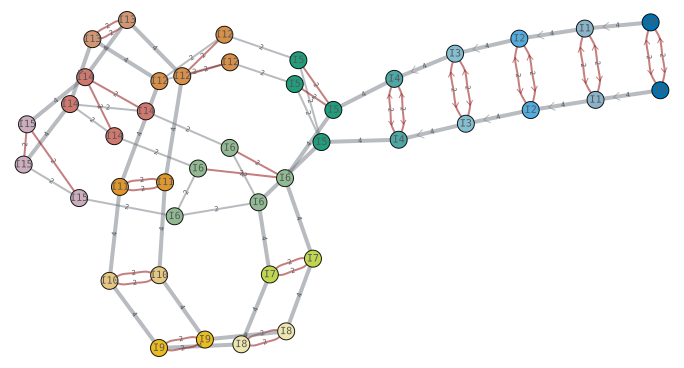

In [6]:
fit = algo_dmrg.FIT(mpo_g, p=mpo, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5, L-1], stop_grad_=False)
fit.visual(figsize=(12,12), show_inds="bond-size", show_tags=True)


In [7]:
start_time = time.time()
fit.run_gate(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()
fit.loss

--- 0.06729006767272949 reuse ---


[0.11491862427076938,
 0.15142996825334035,
 0.1619175085970345,
 0.16542842982812994,
 0.16704559621918555]

In [8]:
fit = algo_dmrg.FIT(mpo_g, p = mpo, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])

start_time = time.time()
fit.run_eff(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()
fit.loss

--- 0.07693099975585938 reuse ---


[0.11491862427076932,
 0.15142996825334037,
 0.16191750859703466,
 0.16542842982813014,
 0.1670455962191854]

In [9]:
fit = algo_dmrg.FIT(mpo_g, p = mpo, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])

start_time = time.time()
fit.run(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()
print(value)
fit.loss


--- 0.11340904235839844 reuse ---
0.40871211900209786


[0.11491862427076942,
 0.15142996825334026,
 0.1619175085970346,
 0.16542842982813002,
 0.1670455962191855]

In [10]:
info_c = {}
p = qtn.MPS_rand_state(L=L, bond_dim=20, seed=4)
p.canonicalize_([5, L-1], cur_orthog='calc', info=info_c)

p_g = algo_dmrg.gate_1d(p, (6, L-1), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=False)
algo_dmrg.gate_1d(p_g, (5, 12), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)
p_g = algo_dmrg.gate_1d(p_g, (6, 14), qu.CNOT(), ind_id="k{}", site_tags="I{}", contract='split-gate', inplace=True)






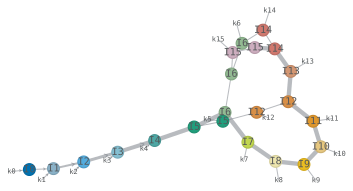

In [11]:
p_g.draw(p.site_tags, legend=False)

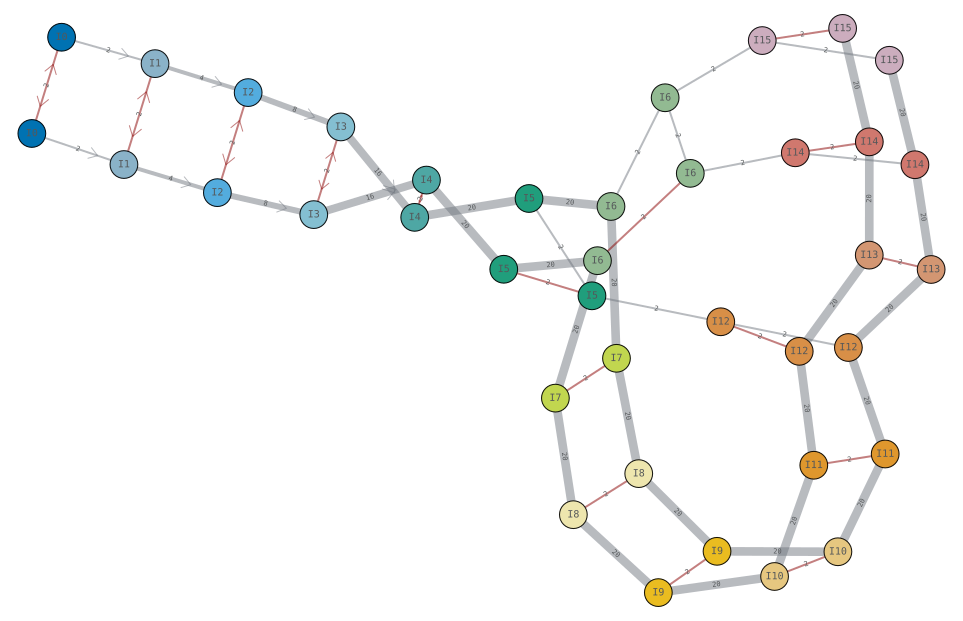

In [12]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])
fit.visual(figsize=(17,17), show_inds="bond-size", show_tags=True)


In [13]:
p_g

MatrixProductState(tensors=22, indices=40, L=16, max_bond=20)

In [14]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False, range_int=[5,L-1])

start_time = time.time()
fit.run_gate(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()



--- 0.05964088439941406 reuse ---


In [15]:
fit.loss

[0.5293340581114093,
 0.7182570757238892,
 0.7553073115236233,
 0.7744880970067679,
 0.7864210641246732]

In [16]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False)

start_time = time.time()
fit.run(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()



--- 0.12917613983154297 reuse ---


In [17]:
fit.loss

[0.5293340581114095,
 0.7182570757238884,
 0.7553073115236236,
 0.7744880970067685,
 0.7864210641246737]

In [18]:
fit = algo_dmrg.FIT(p_g, p=p, site_tag_id="I{}", opt=opt, re_tag=False)

start_time = time.time()
fit.run_eff(n_iter=5, verbose=True)
print(f"--- %s reuse ---" % (time.time() - start_time))
start_time = time.time()
value = fit.p.norm()



--- 0.07813596725463867 reuse ---


In [19]:
fit.loss

[0.5293340581114091,
 0.7182570757238896,
 0.755307311523623,
 0.7744880970067685,
 0.7864210641246729]